# **Proyek Predictive Analytics: Prediksi Risiko Stroke**
- **Nama:** Maulana Seno Aji Yudhantara
- **Email:** senoaji115@gmail.com
- **ID Dicoding:** bang_aji
- **Cohort ID Coding Camp:** MC117D5Y1789

## **Domain Proyek**

Menurut World Health Organization (WHO), stroke adalah penyebab kematian kedua terbesar secara global dan penyebab utama kecacatan. Prediksi dini terhadap risiko stroke dapat membantu para profesional medis dalam mengambil tindakan pencegahan dan memberikan perawatan yang lebih efektif kepada pasien. Oleh karena itu, pengembangan model *predictive analytics* yang akurat untuk mengidentifikasi individu dengan risiko tinggi sangatlah penting.

Proyek ini akan berfokus pada domain **kesehatan**, dengan tujuan membangun model klasifikasi untuk memprediksi kemungkinan seorang pasien mengalami stroke berdasarkan data riwayat kesehatan dan demografis.

## **Business Understanding**

### Problem Statements
- Bagaimana cara mengidentifikasi faktor-faktor utama yang berkontribusi terhadap risiko stroke pada pasien?
- Bagaimana cara membangun model machine learning yang dapat memprediksi secara akurat apakah seorang pasien berisiko terkena stroke atau tidak?

### Goals
- Mengidentifikasi variabel-variabel paling berpengaruh yang menjadi prediktor kuat untuk risiko stroke.
- Mengembangkan sebuah model klasifikasi dengan tingkat akurasi dan metrik evaluasi lain yang setinggi mungkin untuk dapat diimplementasikan sebagai sistem pendukung keputusan bagi tenaga medis.

## Menyiapkan Semua Library yang Dibutuhkan

Tahap pertama adalah mengimpor semua library yang akan kita gunakan selama proses pengembangan model. Semua library diimpor di awal untuk menjaga kerapian kode sesuai dengan standar *best practice*.

In [2]:
# Libraries untuk Data Manipulation dan Analysis
import numpy as np
import pandas as pd

# Libraries untuk Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries untuk Data Preprocessing dan Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Library untuk mengatasi Imbalanced Data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Libraries untuk Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Libraries untuk Evaluasi Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Mengatur agar tampilan visualisasi lebih baik
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

## **Data Understanding**

Tahap ini berfokus pada pemahaman awal terhadap dataset yang akan digunakan. Kita akan memuat data, melihat struktur dasarnya, dan memeriksa informasi statistik deskriptif.

### Memuat Dataset
Kita akan memuat dataset `healthcare-dataset-stroke-data.csv` menggunakan library pandas.

In [3]:
file_path = 'healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Informasi Dasar Dataset
Untuk memahami struktur data, kita akan melihat informasi umum seperti jumlah baris, jumlah kolom, tipe data setiap kolom, dan jumlah data non-null.

In [4]:
# Menampilkan informasi ringkas tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Statistik Deskriptif
Melihat statistik deskriptif untuk fitur-fitur numerik untuk memahami distribusi data seperti mean, median, standar deviasi, dll.

In [5]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Pemeriksaan Missing Values
Langkah penting dalam pemahaman data adalah mengidentifikasi apakah terdapat data yang hilang (missing values) pada setiap kolom.

In [6]:
# Memeriksa jumlah missing values di setiap kolom
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## **Exploratory Data Analysis (EDA)**

Pada tahap ini, kita akan melakukan analisis data eksplorasi untuk mendapatkan wawasan lebih dalam dari dataset. Kita akan melihat distribusi dari setiap variabel, hubungan antar variabel, dan bagaimana variabel-variabel tersebut berhubungan dengan variabel target (`stroke`).

### Menghapus Kolom yang Tidak Relevan
Kolom `id` tidak memberikan informasi yang berguna untuk pemodelan, jadi kita akan menghapusnya terlebih dahulu.

In [7]:
df.drop(columns=['id'], inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Analisis Variabel Target (`stroke`)
Langkah pertama dalam EDA adalah memahami distribusi dari variabel target kita. Ini penting untuk mengetahui apakah dataset kita seimbang (*balanced*) atau tidak (*imbalanced*).

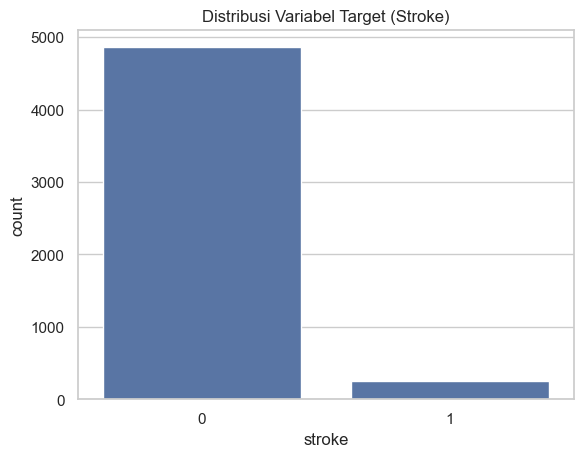

stroke
0    4861
1     249
Name: count, dtype: int64

In [8]:
# Melihat distribusi dari variabel target 'stroke'
sns.countplot(x='stroke', data=df)
plt.title('Distribusi Variabel Target (Stroke)')
plt.show()

# Menampilkan jumlah pasti dari setiap kelas
df['stroke'].value_counts()

### Analisis Fitur Kategorikal
Sekarang kita akan menganalisis fitur-fitur kategorikal untuk melihat distribusinya dan hubungannya dengan risiko stroke. Fitur-fitur ini antara lain `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, dan `smoking_status`.

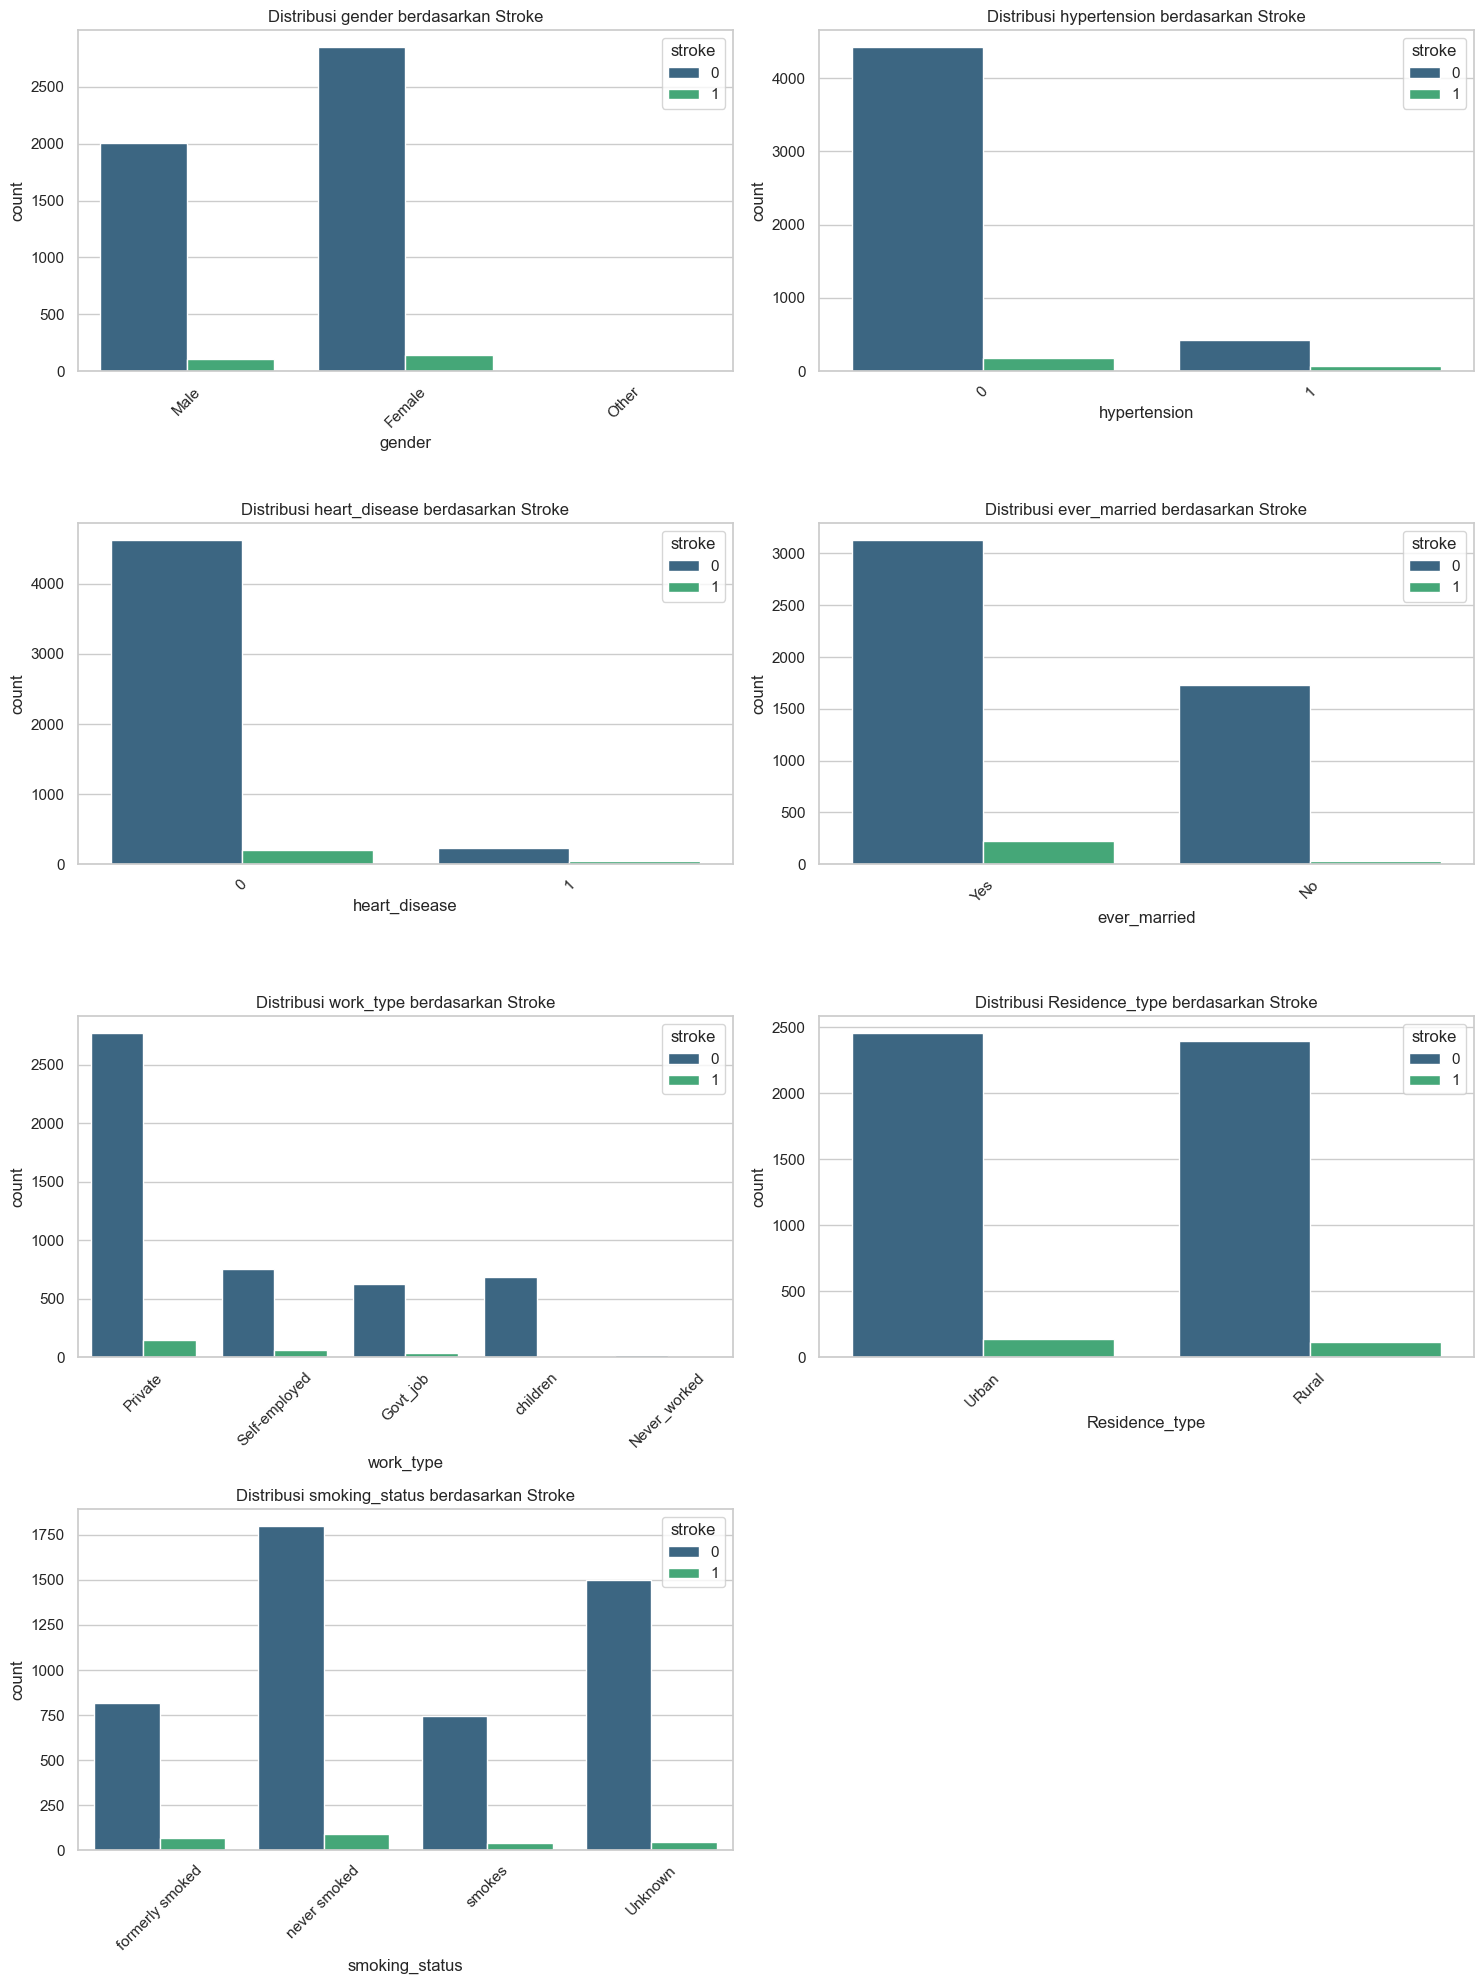

In [9]:
# Daftar fitur kategorikal
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Membuat plot untuk setiap fitur kategorikal
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=col, data=df, hue='stroke', palette='viridis')
    plt.title(f'Distribusi {col} berdasarkan Stroke')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### Analisis Fitur Numerik
Selanjutnya, kita akan menganalisis distribusi dari fitur-fitur numerik (`age`, `avg_glucose_level`, `bmi`) dan melihat bagaimana distribusinya berbeda antara pasien yang mengalami stroke dan yang tidak.

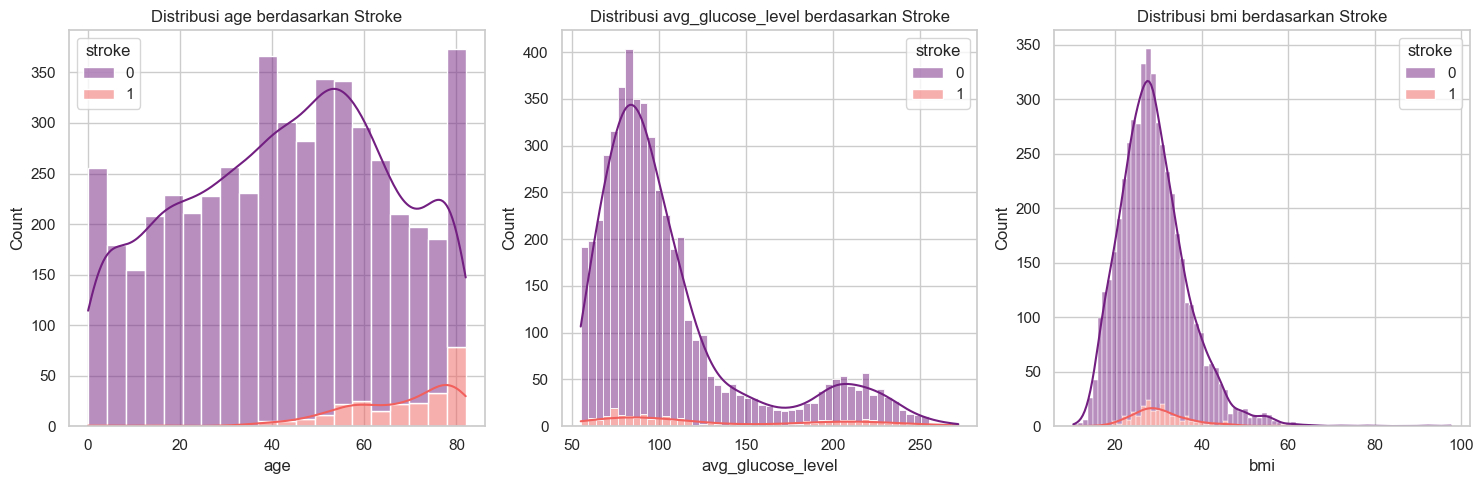

In [10]:
# Daftar fitur numerik
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Membuat plot distribusi untuk setiap fitur numerik
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, hue='stroke', kde=True, multiple='stack', palette='magma')
    plt.title(f'Distribusi {col} berdasarkan Stroke')
    plt.tight_layout()

plt.show()

### Analisis Korelasi Antar Fitur Numerik
Terakhir, kita akan melihat matriks korelasi untuk memahami hubungan linear antara fitur-fitur numerik. Ini juga membantu mendeteksi adanya multikolinearitas.

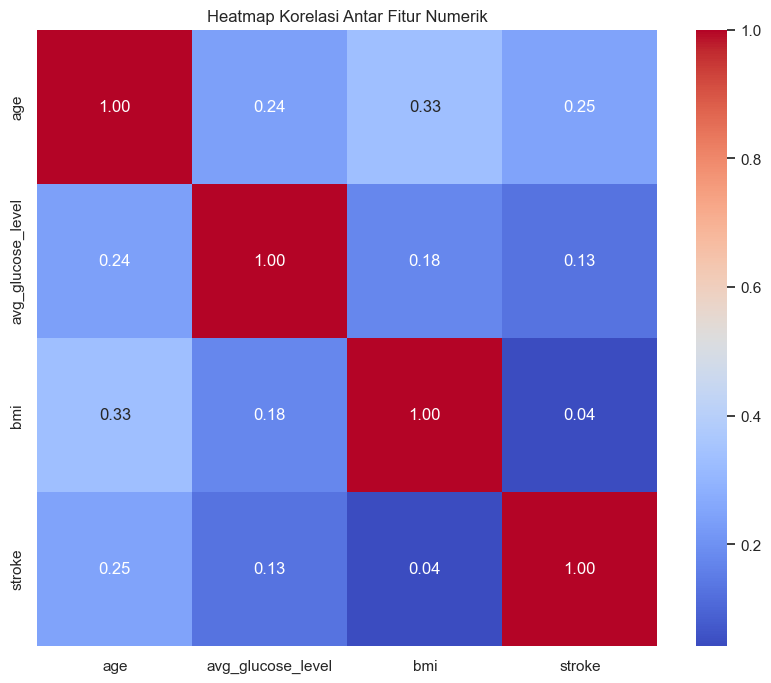

In [11]:
# Menghitung matriks korelasi hanya untuk fitur numerik
correlation_matrix = df[numerical_features + ['stroke']].corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

### Rangkuman Temuan dari EDA

Berdasarkan analisis eksplorasi data yang telah dilakukan, berikut adalah beberapa temuan kunci yang lebih detail:

- **Imbalanced Dataset**: Dataset sangat tidak seimbang (*highly imbalanced*). Dari total 5110 data, hanya terdapat **249 kasus stroke (4.87%)** dibandingkan dengan **4861 kasus non-stroke**. Hal ini akan sangat memengaruhi pemilihan metrik evaluasi (akurasi saja tidak akan cukup) dan memerlukan teknik penanganan khusus pada tahap *data preparation*, seperti *oversampling* (SMOTE).

- **Faktor Usia adalah Prediktor Terkuat**: Visualisasi distribusi mengonfirmasi bahwa usia adalah faktor risiko paling signifikan. Mayoritas pasien stroke berusia di atas 60 tahun, dengan puncak kasus terjadi di sekitar **usia 70-80 tahun**. Heatmap korelasi juga mendukung hal ini, di mana `age` memiliki korelasi positif tertinggi dengan `stroke` (0.25) di antara fitur numerik lainnya.

- **Faktor Kondisi Medis yang Signifikan**: Pasien dengan riwayat `hypertension` (hipertensi) dan `heart_disease` (penyakit jantung) secara proporsional menunjukkan jumlah kasus stroke yang jauh lebih tinggi. Ini menandakan keduanya adalah faktor risiko yang sangat penting.

- **Pengaruh Glukosa dan BMI**:
  - Distribusi `avg_glucose_level` pada pasien stroke cenderung lebih tinggi dibandingkan non-stroke, menandakan ini bisa menjadi prediktor yang relevan.
  - Sebaliknya, distribusi `bmi` antara pasien stroke dan non-stroke terlihat sangat mirip. Hal ini didukung oleh nilai korelasi `bmi` dengan `stroke` yang sangat rendah (0.04), menunjukkan bahwa BMI mungkin bukan prediktor yang kuat dalam dataset ini.

- **Faktor Gaya Hidup dan Demografis Lainnya**:
  - Pasien yang `pernah menikah` (`ever_married` = Yes) memiliki proporsi stroke yang lebih tinggi.
  - `work_type` 'Self-employed' dan `smoking_status` 'formerly smoked' juga menunjukkan proporsi stroke yang sedikit lebih tinggi.
  - `Residence_type` (Urban vs Rural) tampaknya tidak menunjukkan perbedaan yang signifikan dalam risiko stroke.

- **Missing Values Tetap Menjadi Perhatian**: Terdapat **201 *missing values*** pada kolom `bmi` yang harus ditangani pada tahap selanjutnya sebelum data dapat digunakan untuk melatih model.

## **Data Preparation**

Pada tahap ini, kita akan melakukan persiapan data sebelum masuk ke tahap pemodelan. Proses ini mencakup beberapa langkah penting seperti menangani nilai yang hilang, melakukan encoding pada fitur kategorikal, melakukan penskalaan pada fitur numerik, dan membagi dataset menjadi data latih dan data uji.

### Menangani Kategori 'Other' pada Fitur Gender

Pada tahap EDA, kita melihat ada satu data dengan kategori 'Other' pada fitur `gender`. Karena jumlahnya hanya satu, data ini tidak akan memberikan informasi yang signifikan dan dapat dianggap sebagai *noise*. Kita akan menghapus baris data ini.

In [12]:
# Menampilkan baris dengan gender 'Other'
df[df['gender'] == 'Other']

# Menghapus baris tersebut
df = df[df['gender'] != 'Other']

# Memeriksa kembali nilai unik pada kolom gender
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

### Menangani Missing Values pada Fitur `bmi`

Seperti yang ditemukan pada tahap EDA, terdapat 201 nilai yang hilang (*missing values*) pada kolom `bmi`. Karena `bmi` adalah fitur numerik yang penting, kita tidak akan menghapus barisnya. Sebagai gantinya, kita akan mengisi nilai yang hilang tersebut (imputasi) menggunakan nilai **median** dari kolom `bmi`.

Alasan menggunakan median adalah karena lebih tahan terhadap nilai ekstrem (*outliers*) dibandingkan dengan mean (rata-rata), sehingga tidak akan terlalu terpengaruh oleh data `bmi` yang sangat tinggi atau rendah.

In [14]:
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# Memeriksa kembali missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Membagi Dataset menjadi Fitur (X) dan Target (y)

Langkah selanjutnya adalah memisahkan dataset menjadi dua bagian:
1.  **X**: Fitur-fitur independen yang akan digunakan untuk membuat prediksi.
2.  **y**: Variabel dependen atau target yang ingin kita prediksi (`stroke`).

In [15]:
X = df.drop(columns=['stroke'])
y = df['stroke']

### Encoding Fitur Kategorikal

Model machine learning hanya dapat memproses data numerik. Oleh karena itu, kita perlu mengubah fitur-fitur kategorikal (`gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`) menjadi representasi numerik. Kita akan menggunakan teknik **One-Hot Encoding**.

One-Hot Encoding akan membuat kolom biner baru untuk setiap kategori dalam sebuah fitur. Ini adalah pendekatan yang baik karena tidak mengasumsikan adanya urutan pada kategori.

In [16]:
# Identifikasi kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Membuat preprocessor dengan ColumnTransformer
# OneHotEncoder untuk data kategorikal, StandardScaler untuk data numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

### Membagi Data menjadi Data Latih dan Data Uji (Train-Test Split)

Sekarang kita akan membagi data menjadi dua set: 80% untuk data latih (*training set*) dan 20% untuk data uji (*testing set*). Pembagian ini penting untuk dapat mengevaluasi performa model pada data yang belum pernah "dilihat" sebelumnya.

Kita juga akan menggunakan parameter `stratify=y` untuk memastikan bahwa proporsi kelas target (stroke vs non-stroke) tetap sama di kedua set, yang sangat penting untuk dataset yang tidak seimbang.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 4087
Jumlah data uji: 1022


### Menangani Ketidakseimbangan Data dengan SMOTE

Seperti yang kita ketahui, dataset kita sangat tidak seimbang. Untuk mengatasinya, kita akan menerapkan teknik *oversampling* yaitu **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE akan membuat sampel sintetis dari kelas minoritas (pasien stroke) sehingga jumlahnya menjadi seimbang dengan kelas mayoritas.

**PENTING**: SMOTE hanya diterapkan pada **data latih (`X_train`, `y_train`)**. Ini untuk mencegah *data leakage*, di mana informasi dari data uji bocor ke dalam proses pelatihan, yang dapat menyebabkan evaluasi model menjadi tidak realistis dan terlalu optimis.

In [18]:
# Terapkan pre-processing pada data latih
X_train_processed = preprocessor.fit_transform(X_train)

# Terapkan SMOTE pada data latih yang sudah di-preprocess
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Terapkan pre-processing pada data uji
X_test_processed = preprocessor.transform(X_test)

print("Jumlah kelas sebelum SMOTE:")
print(y_train.value_counts())
print("\nJumlah kelas setelah SMOTE:")
print(y_train_resampled.value_counts())

Jumlah kelas sebelum SMOTE:
stroke
0    3888
1     199
Name: count, dtype: int64

Jumlah kelas setelah SMOTE:
stroke
0    3888
1    3888
Name: count, dtype: int64


## **Modeling**

Setelah data siap, kita akan masuk ke tahap pemodelan. Kita akan melatih beberapa algoritma klasifikasi pada data latih yang sudah diseimbangkan (`X_train_resampled` dan `y_train_resampled`). Kemudian, performa dari setiap model akan diuji menggunakan data uji (`X_test_processed` dan `y_test`).

### Menyiapkan DataFrame untuk Analisis Model

Kita akan membuat sebuah DataFrame untuk menyimpan metrik evaluasi dari setiap model. Ini akan memudahkan kita untuk membandingkan performa antar model secara langsung. Metrik yang akan kita gunakan adalah Akurasi, Presisi, Recall, dan F1-Score untuk kelas 1 (pasien stroke).

In [19]:
# Membuat DataFrame untuk menyimpan hasil evaluasi
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

### Model 1: Logistic Regression (Baseline)

Logistic Regression adalah model linear yang sederhana dan cocok digunakan sebagai *baseline*. Model ini memprediksi probabilitas dari kelas target.

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.84       972
           1       0.14      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022



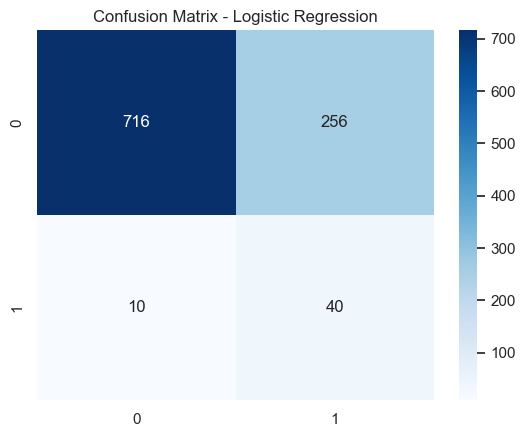

In [20]:
# Melatih model Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Memprediksi data uji
y_pred_log_reg = log_reg.predict(X_test_processed)

# Evaluasi model
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
precision_lr = precision_score(y_test, y_pred_log_reg)
recall_lr = recall_score(y_test, y_pred_log_reg)
f1_lr = f1_score(y_test, y_pred_log_reg)

# Menyimpan hasil ke DataFrame
results.loc[0] = ['Logistic Regression', accuracy_lr, precision_lr, recall_lr, f1_lr]

# Menampilkan classification report dan confusion matrix
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Model 2: K-Nearest Neighbors (KNN)

KNN adalah algoritma non-parametrik yang mengklasifikasikan data baru berdasarkan mayoritas kelas dari 'k' tetangga terdekatnya.

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.84      0.90       972
           1       0.10      0.36      0.16        50

    accuracy                           0.82      1022
   macro avg       0.53      0.60      0.53      1022
weighted avg       0.92      0.82      0.86      1022



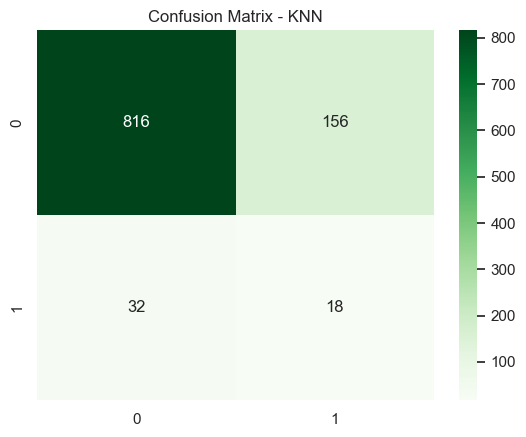

In [21]:
# Melatih model KNN
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)

# Memprediksi data uji
y_pred_knn = knn.predict(X_test_processed)

# Evaluasi model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Menyimpan hasil ke DataFrame
results.loc[1] = ['K-Nearest Neighbors', accuracy_knn, precision_knn, recall_knn, f1_knn]

# Menampilkan classification report dan confusion matrix
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN')
plt.show()

### Model 3: Random Forest
Random Forest adalah model *ensemble* yang terdiri dari banyak *decision tree*. Model ini cenderung sangat kuat dan tahan terhadap *overfitting*.

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.19      0.10      0.13        50

    accuracy                           0.93      1022
   macro avg       0.57      0.54      0.55      1022
weighted avg       0.92      0.93      0.93      1022



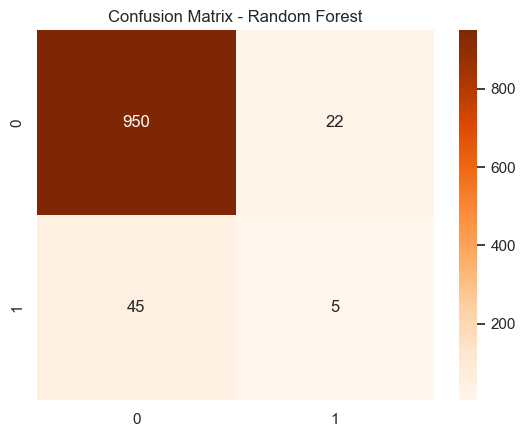

In [22]:
# Melatih model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Memprediksi data uji
y_pred_rf = rf.predict(X_test_processed)

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Menyimpan hasil ke DataFrame
results.loc[2] = ['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_rf]

# Menampilkan classification report dan confusion matrix
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Model 4: Support Vector Machine (SVM)

SVM bekerja dengan mencari *hyperplane* optimal yang dapat memisahkan data ke dalam kelas-kelas yang berbeda dengan margin semaksimal mungkin.

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87       972
           1       0.11      0.52      0.18        50

    accuracy                           0.77      1022
   macro avg       0.54      0.65      0.52      1022
weighted avg       0.93      0.77      0.83      1022



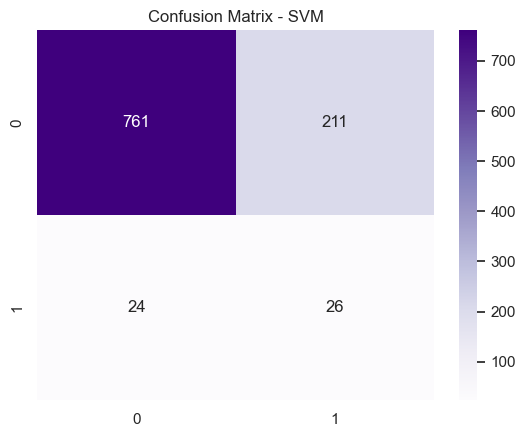

In [23]:
# Melatih model SVM
svm = SVC(random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

# Memprediksi data uji
y_pred_svm = svm.predict(X_test_processed)

# Evaluasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Menyimpan hasil ke DataFrame
results.loc[3] = ['Support Vector Machine', accuracy_svm, precision_svm, recall_svm, f1_svm]

# Menampilkan classification report dan confusion matrix
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - SVM')
plt.show()

## **Evaluation**

Pada tahap evaluasi, kita akan membandingkan performa dari keempat model yang telah kita latih untuk menentukan model mana yang terbaik dalam memprediksi risiko stroke. Kunci dari evaluasi ini adalah memilih metrik yang paling sesuai dengan konteks masalah.

### Perbandingan Performa Model

Pertama, mari kita tampilkan kembali DataFrame yang berisi hasil evaluasi dari semua model untuk melihat perbandingan secara kuantitatif.

In [24]:
# Menampilkan DataFrame hasil evaluasi
results.sort_values(by='Recall', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.739726,0.135135,0.80,0.231214
3,Support Vector Machine,0.770059,0.109705,0.52,0.181185
1,K-Nearest Neighbors,0.816047,0.103448,0.36,0.160714
2,Random Forest,0.934442,0.185185,0.10,0.129870


### Analisis Metrik Evaluasi

Dalam kasus medis seperti prediksi stroke, **akurasi saja tidak cukup** untuk menjadi tolok ukur utama. Ada dua metrik yang jauh lebih penting:

1.  **Recall (Sensitivity)**: Mengukur kemampuan model untuk mengidentifikasi semua kasus positif yang sebenarnya. Dalam konteks ini, Recall menunjukkan seberapa baik model kita dalam **menemukan pasien yang benar-benar berisiko stroke**.
2.  **Precision**: Mengukur seberapa akurat prediksi positif yang dibuat model. Artinya, dari semua pasien yang diprediksi berisiko stroke, berapa persen yang benar-benar berisiko.

**Prioritas Utama kita adalah Recall yang tinggi.** Mengapa? Karena **False Negative** (gagal mendeteksi pasien yang berisiko stroke) memiliki konsekuensi yang jauh lebih berbahaya daripada **False Positive** (pasien sehat diprediksi berisiko, yang mungkin hanya memerlukan pemeriksaan lebih lanjut). Kita tidak ingin ada pasien berisiko yang terlewatkan oleh sistem kita.

Dari hasil yang ada:
- **Random Forest** memiliki **akurasi tertinggi (93%)**, namun **recall-nya sangat rendah (0.10)**. Artinya, model ini hanya berhasil mengidentifikasi 10% dari total pasien stroke yang sebenarnya. Model ini cenderung aman dengan memprediksi 'tidak stroke' dan melewatkan banyak kasus penting.
- **Logistic Regression** menunjukkan **Recall tertinggi (0.80)**. Ini berarti model ini mampu mengidentifikasi **80% dari semua pasien stroke** yang ada di data uji. Meskipun presisinya rendah (0.14), yang berarti ada banyak *false positive*, model ini paling berhasil dalam memenuhi tujuan utama kita: meminimalkan risiko pasien stroke terlewatkan.
- **KNN** dan **SVM** memiliki performa recall di antara keduanya, namun tidak ada yang seefektif Logistic Regression.

### Visualisasi Perbandingan Model

Untuk mempermudah perbandingan, mari kita visualisasikan metrik Precision, Recall, dan F1-Score dari setiap model menggunakan diagram batang.

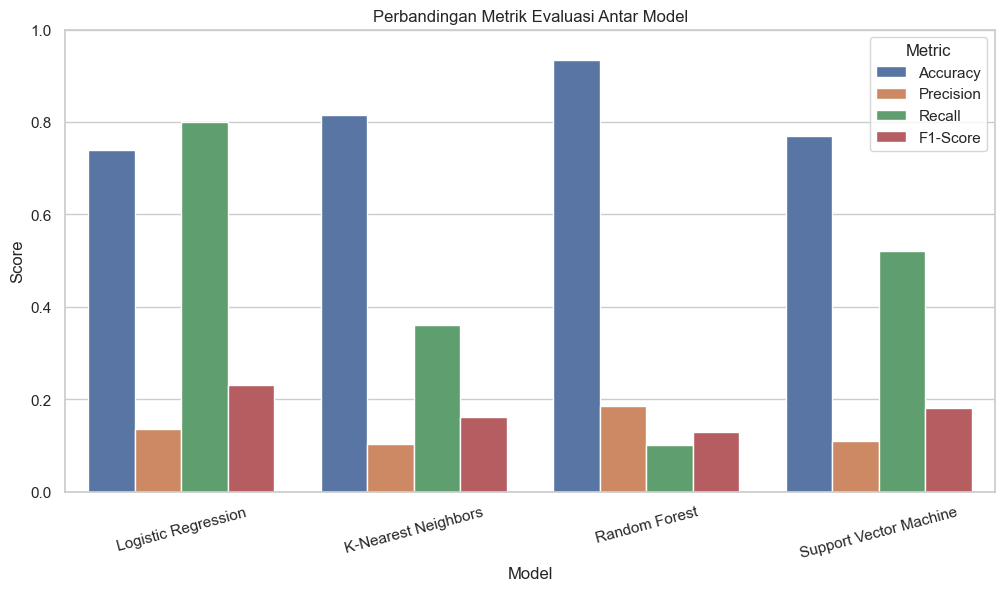

In [25]:
# Melelehkan DataFrame untuk visualisasi yang lebih mudah dengan seaborn
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted)
plt.title('Perbandingan Metrik Evaluasi Antar Model')
plt.ylim(0, 1.0)
plt.xticks(rotation=15)
plt.show()

### Kesimpulan Evaluasi: Pemilihan Model Terbaik

Berdasarkan analisis di atas, **Logistic Regression** dipilih sebagai model terbaik untuk masalah prediksi risiko stroke ini.

**Justifikasi:**
Meskipun akurasinya bukan yang tertinggi, model Logistic Regression memberikan nilai **Recall (0.80)** yang jauh mengungguli model-model lainnya. Dalam aplikasi medis, kemampuan untuk mendeteksi sebanyak mungkin kasus positif (meminimalkan False Negative) adalah prioritas absolut. Tingginya angka *False Positive* pada model ini adalah sebuah *trade-off* yang dapat diterima, karena konsekuensinya (misalnya, tes medis lanjutan) jauh lebih ringan dibandingkan dengan risiko gagal mendiagnosis pasien yang berisiko tinggi.

Dengan demikian, model Logistic Regression adalah solusi yang paling praktis dan aman untuk diimplementasikan sebagai sistem pendukung keputusan bagi tenaga medis.